c:\Users\julie\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\julie\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Appartement 1: Surface=40m², Prix=150000€ -> Type=F4
Appartement 2: Surface=70m², Prix=280000€ -> Type=F2
Appartement 3: Surface=50m², Prix=180000€ -> Type=F2


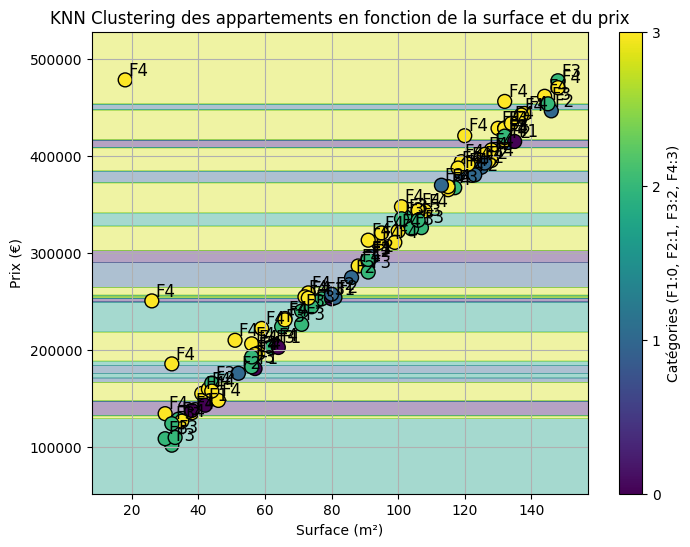

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.05-Naive-Bayes.ipynb

# Création du DataFrame avec les données fournies

df = pd.read_csv('appartements.csv')

# Définir les classes F1, F2, F3, F4



def classify_apartment_by_surface(surface):
    if surface < 40:
        return 'F1'
    elif 40 <= surface < 60:
        return 'F2'
    elif 60 <= surface < 80:
        return 'F3'
    else:
        return 'F4'

df['apartment_type'] = df['surface'].apply(classify_apartment_by_surface)

# Encodage des catégories F1, F2, F3, F4
label_encoder = LabelEncoder()
df['apartment_type_encoded'] = label_encoder.fit_transform(
    df['apartment_type'])

# Extraction des variables indépendantes (surface et prix) et dépendante (type d'appartement)
X = df[['surface', 'price']]  # Variables explicatives
y = df['apartment_type_encoded']  # Variable cible (F1, F2, F3, F4)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle KNN (avec k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


# Prédictions pour de nouveaux appartements (surface et prix)
new_apartments = np.array([[40, 150000], [70, 280000], [50, 180000]])
predicted_types = knn.predict(new_apartments)

# Décodage des prédictions
predicted_categories = label_encoder.inverse_transform(predicted_types)

# Afficher les résultats
for i, pred in enumerate(predicted_categories):
    print(
        f"Appartement {i + 1}: Surface={new_apartments[i][0]}m², Prix={new_apartments[i][1]}€ -> Type={pred}")
    

# Générer une grille de points pour afficher la classification
x_min, x_max = df['surface'].min() - 10, df['surface'].max() + 10
y_min, y_max = df['price'].min() - 50000, df['price'].max() + 50000
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 1000))

# Prédire la classe pour chaque point de la grille
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracer les régions de décision avec la classification F1, F2, F3
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.4)

# Tracer les points existants
scatter = plt.scatter(df['surface'], df['price'],
                      c=df['apartment_type_encoded'], cmap='viridis', s=100, edgecolor='k')

# Ajouter des annotations pour les clusters
for i, row in df.iterrows():
    plt.annotate(f"{row['apartment_type']}",
                 (row['surface']+1, row['price']+5000), fontsize=12)

# Labels et titre
plt.title('KNN Clustering des appartements en fonction de la surface et du prix')
plt.xlabel('Surface (m²)')
plt.ylabel('Prix (€)')
plt.colorbar(scatter, ticks=[0, 1, 2, 3],
             label='Catégories (F1:0, F2:1, F3:2, F4:3)')
plt.grid(True)
plt.show()

c:\Users\julie\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


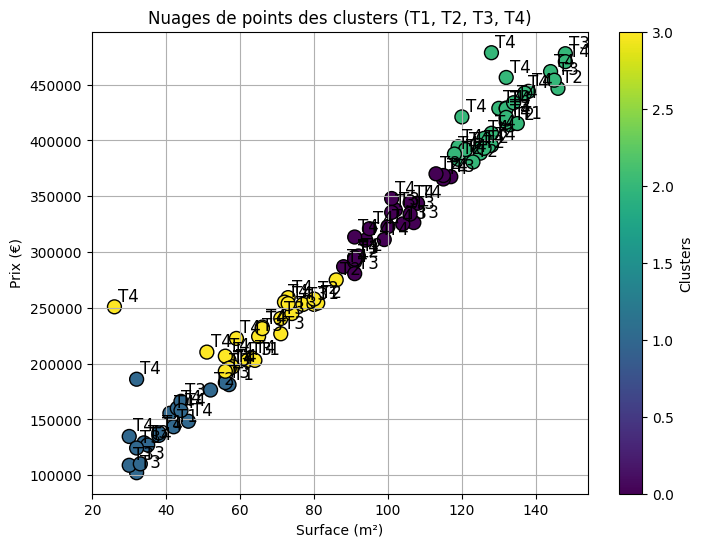

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Création d'un DataFrame avec des appartements fictifs
df = pd.read_csv('appartements.csv')

# Définir les classes T1, T2, T3, T4 en fonction du nombre de pièces


# Définir les classes T1, T2, T3, T4 en fonction du nombre de pièces


def classify_apartment(nb_rooms):
    if nb_rooms == 1:
        return 'T1'
    elif nb_rooms == 2:
        return 'T2'
    elif nb_rooms == 3:
        return 'T3'
    else:
        return 'T4'


df['apartment_type'] = df['nbRooms'].apply(classify_apartment)

# Encodage des catégories T1, T2, T3, T4
label_encoder = LabelEncoder()
df['apartment_type_encoded'] = label_encoder.fit_transform(
    df['apartment_type'])

# Créer une représentation bidimensionnelle pour les clusters
X = df[['surface', 'price']]
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Tracer les clusters en nuages de points
plt.figure(figsize=(8, 6))

# Tracer les points avec des couleurs différentes pour chaque cluster
scatter = plt.scatter(df['surface'], df['price'],
                      c=df['cluster'], cmap='viridis', s=100, edgecolor='k')

# Ajouter des annotations pour chaque point
for i, row in df.iterrows():
    plt.annotate(f"{row['apartment_type']}",
                 (row['surface']+1, row['price']+5000), fontsize=12)

# Labels et titre
plt.title('Nuages de points des clusters (T1, T2, T3, T4)')
plt.xlabel('Surface (m²)')
plt.ylabel('Prix (€)')

# Affichage des clusters
plt.colorbar(scatter, label='Clusters')
plt.grid(True)
plt.show()

In [26]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

# save "bunch" object containing iris dataset and its attributes
iris = load_iris()

# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

In [27]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
print(knn)

KNeighborsClassifier(n_neighbors=2)


In [31]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
print(knn)

50 observations
4 features (sepal length, sepal width, petal length, petal width)
Response variable is the iris species
Classification problem since response is categorical
More information in the UCI Machine Learning Repository

In [35]:
knn.predict([[3, 5, 4, 2]])

array([1])

In [41]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
pred = knn.predict(X_new)
# Nom des classes
class_names = iris.target_names
print("Classes", class_names)
# Convertir les prédictions en noms de fleurs
predicted_fleurs = [class_names[p] for p in pred]

# Afficher les résultats
for i, flower in enumerate(predicted_fleurs):
    print(f"Observation {i+1}: Prédiction -> {flower}")
    

Classes ['setosa' 'versicolor' 'virginica']
Observation 1: Prédiction -> versicolor
Observation 2: Prédiction -> versicolor


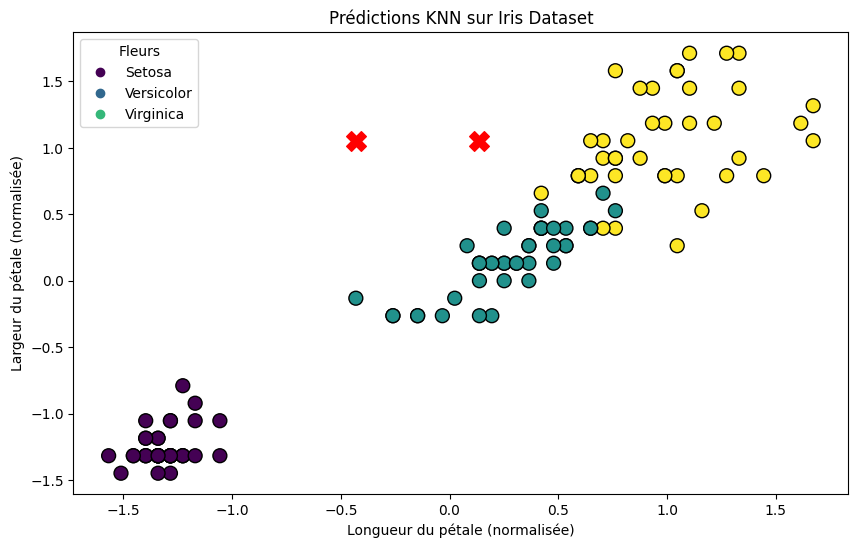

In [44]:
# Complet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Charger le jeu de données Iris
iris = load_iris()
X = iris.data  # Caractéristiques (sépal/pétal)
y = iris.target  # Labels (noms des fleurs)

# Nom des classes
class_names = iris.target_names

# Normalisation des données (optionnel mais recommandé pour KNN)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Prédiction pour de nouveaux exemples
X_new = scaler.transform([[3, 5, 4, 2], [5, 4, 3, 2]])
pred = knn.predict(X_new)

# Convertir les prédictions en noms de fleurs
predicted_fleurs = [class_names[p] for p in pred]

# Visualiser les données d'iris avec les classes prédictives
plt.figure(figsize=(10, 6))

# Sélectionner deux caractéristiques pour visualisation (petal length, petal width)
plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train, cmap='viridis', edgecolor='k', s=100, label='Entraînement')

# Tracer les nouveaux points prédits
plt.scatter(X_new[:, 2], X_new[:, 3], c='red', s=200, marker='X', label='Prédictions')

# Ajouter la légende des noms de fleurs
legend_labels = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
handles, _ = scatter.legend_elements()
plt.legend(handles, [legend_labels[i] for i in range(3)], title="Fleurs")

# Labels et titre
plt.title('Prédictions KNN sur Iris Dataset')
plt.xlabel('Longueur du pétale (normalisée)')
plt.ylabel('Largeur du pétale (normalisée)')

plt.show()

In [39]:
# Via la Regression Logistique

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg.fit(X, y)

# predict the response for new observations


pred = logreg.predict(X_new)
pred

array([2, 0])